In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([0.5, 0.6, 0.8, 1.1, 1.4])
y = np.array([5.0, 5.5, 6.0, 6.8, 7.0])

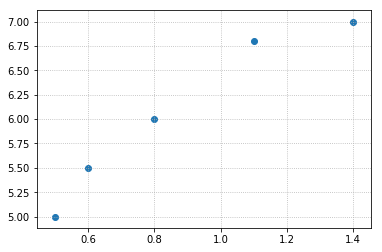

In [3]:
plt.grid(linestyle=':')
plt.scatter(x, y)

   1> w0=1.00000000, w1=1.00000000, loss=44.17500000
   2> w0=1.20900000, w1=1.19060000, loss=36.53882794
   3> w0=1.39916360, w1=1.36357948, loss=30.23168666
   4> w0=1.57220792, w1=1.52054607, loss=25.02222743
   5> w0=1.72969350, w1=1.66296078, loss=20.71937337
   6> w0=1.87303855, w1=1.79215140, loss=17.16530917
   7> w0=2.00353196, w1=1.90932461, loss=14.22969110
   8> w0=2.12234508, w1=2.01557706, loss=11.80486494
   9> w0=2.23054244, w1=2.11190537, loss=9.80191627
  10> w0=2.32909148, w1=2.19921529, loss=8.14740839
  11> w0=2.41887143, w1=2.27832995, loss=6.78068803
  12> w0=2.50068134, w1=2.34999742, loss=5.65166010
  13> w0=2.57524739, w1=2.41489755, loss=4.71894976
  14> w0=2.64322953, w1=2.47364820, loss=3.94838447
  15> w0=2.70522753, w1=2.52681085, loss=3.31174023
  16> w0=2.76178648, w1=2.57489580, loss=2.78570611
  17> w0=2.81340174, w1=2.61836680, loss=2.35102901
  18> w0=2.86052351, w1=2.65764531, loss=1.99180729
  19> w0=2.90356094, w1=2.69311435, loss=1.69490738
  20

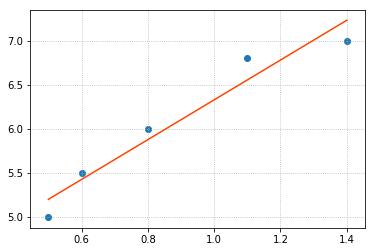

In [22]:
w0, w0s = 1, []
w1, w1s = 1, []
lrate = 0.01  # 学习率
epoch = 1000  # for循环迭代轮数
epoches = []
losses = []

for i in range(epoch):
    # 存储相关参数
    epoches.append(i + 1)
    w0s.append(w0)
    w1s.append(w1)
    loss = ((w0 + w1 * x - y)**2).sum() / 2
    losses.append(loss)
    print('{:4}> w0={:.8f}, w1={:.8f}, loss={:.8f}'.format(
        i + 1, w0, w1, loss))

    # 求w0,w1方向偏导数
    d0 = (w0 + w1 * x - y).sum()
    d1 = (x * (w0 + w1 * x - y)).sum()
    w0 = w0 - lrate * d0
    w1 = w1 - lrate * d1

predictions = w0 + w1 * x
plt.grid(ls=':')
plt.scatter(x, y)
plt.plot(x, predictions, color='orangered')

## 绘图显示梯度下降

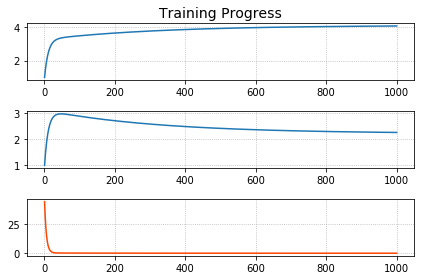

In [23]:
plt.subplot(311)
plt.title('Training Progress', fontsize=14)
plt.grid(ls=':')
plt.plot(epoches, w0s)

plt.subplot(312)
plt.grid(ls=':')
plt.plot(epoches, w1s)

plt.subplot(313)
plt.grid(ls=':')
plt.plot(epoches, losses, color='orangered')

plt.tight_layout()

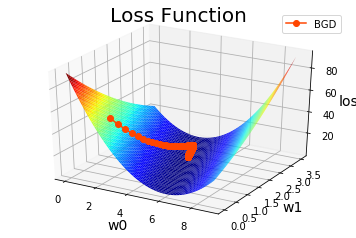

In [24]:
import mpl_toolkits.mplot3d as axes3d

grid_w0, grid_w1 = np.meshgrid(np.linspace(0, 9, 500),
                               np.linspace(0, 3.5, 500))

grid_loss = np.zeros_like(grid_w0)
for px, py in zip(x, y):
    grid_loss += ((grid_w0 + px * grid_w1 - py)**2) / 2

plt.figure('Loss Function')
ax = plt.gca(projection='3d')
plt.title('Loss Function', fontsize=20)
ax.set_xlabel('w0', fontsize=14)
ax.set_ylabel('w1', fontsize=14)
ax.set_zlabel('loss', fontsize=14)
ax.plot_surface(grid_w0,
                grid_w1,
                grid_loss,
                rstride=10,
                cstride=10,
                cmap='jet')
ax.plot(w0s, w1s, losses, 'o-', c='orangered', label='BGD')
plt.legend()

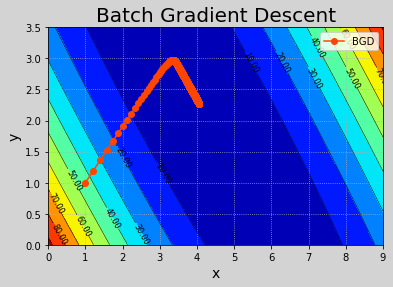

In [25]:
plt.figure('Batch Gradient Descent', facecolor='lightgray')
plt.title('Batch Gradient Descent', fontsize=20)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.tick_params(labelsize=10)
plt.grid(linestyle=':')
plt.contourf(grid_w0, grid_w1, grid_loss, 10, cmap='jet')
cntr = plt.contour(grid_w0, grid_w1, grid_loss, 10,
                  colors='black', linewidths=0.5)
plt.clabel(cntr, inline_spacing=0.1, fmt='%.2f',
          fontsize=8)
plt.plot(w0s, w1s, 'o-', c='orangered', label='BGD')
plt.legend()
plt.show()